<a href="https://colab.research.google.com/github/Tanishall22atat/Codsoft-Machine-Learning/blob/main/my_spam_sms_codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving spam.csv to spam (1).csv


In [ ]:
# ✅ Step 1: Import necessary libraries
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
filename = next(iter(uploaded))

# Try reading as CSV with fallback encodings
try:
    df = pd.read_csv(filename, encoding='latin1')
except UnicodeDecodeError:
    print("Encoding 'latin1' failed, trying 'ISO-8859-1'")
    try:
        df = pd.read_csv(filename, encoding='ISO-8859-1')
    except UnicodeDecodeError:
        print("Encoding 'ISO-8859-1' failed, trying 'cp1252'")
        df = pd.read_csv(filename, encoding='cp1252')

# ✅ Rename relevant columns
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

# ✅ Drop unnecessary columns
df = df[['label', 'message']]

print("Cleaned DataFrame head:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())


Cleaned DataFrame head:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Column names:
['label', 'message']


In [ ]:
# ✅ Step 4: Clean and label encode

print(df.columns)

df = df[[df.columns[0], df.columns[1]]]  # Assuming label and message are the first two columns
df.rename(columns={df.columns[0]: 'label', df.columns[1]: 'message'}, inplace=True)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Check distribution
df['label'].value_counts()


Index(['label', 'message'], dtype='object')


,count
label,
ham,4825
spam,747


In [ ]:
# ✅ Step 5: Split and vectorize
X = df['message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Define a function to train and evaluate models
def train_evaluate_model(model, name):
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    print(f"\n🔍 {name} Classification Report:")
    print(classification_report(y_test, preds, target_names=["Ham", "Spam"]))
    print(f" Accuracy: {accuracy_score(y_test, preds):.4f}")


In [ ]:
# Train Naive Bayes
train_evaluate_model(MultinomialNB(), "Naive Bayes")



🔍 Naive Bayes Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

 Accuracy: 0.9668


In [ ]:
#  Logistic Regression
train_evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")



🔍 Logistic Regression Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

 Accuracy: 0.9525


In [ ]:
# Train Support Vector Machine
train_evaluate_model(LinearSVC(), "Support Vector Machine")



🔍 Support Vector Machine Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       965
        Spam       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

 Accuracy: 0.9785


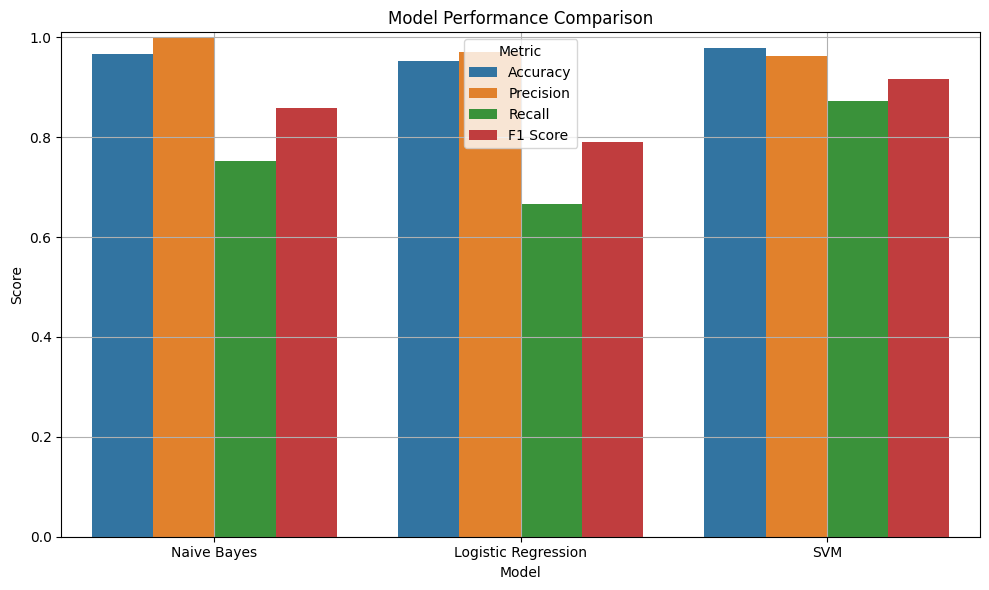

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# ✅ Step: Evaluate all models and store metrics safely
results = {}

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1 Score": f1_score(y_test, preds, zero_division=0)
    }

results_df = pd.DataFrame(results).T

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index().melt(id_vars='index'),
            x='index', y='value', hue='variable')
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0.0, 1.01)
plt.legend(title='Metric')
plt.grid(True)
plt.tight_layout()
plt.show()


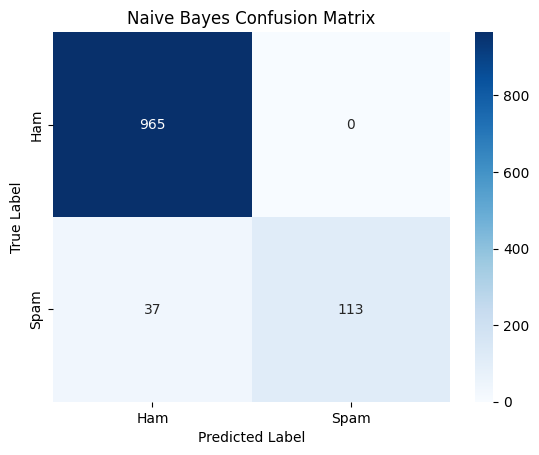

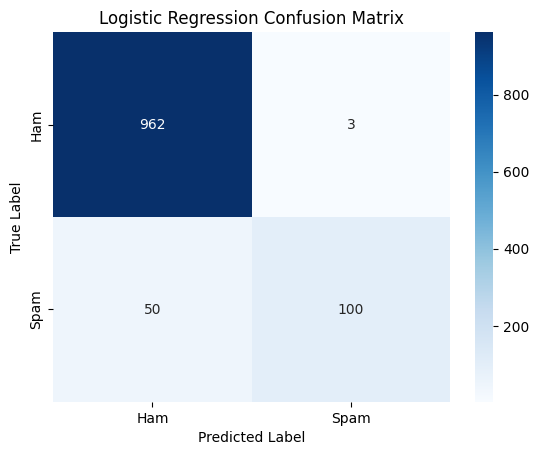

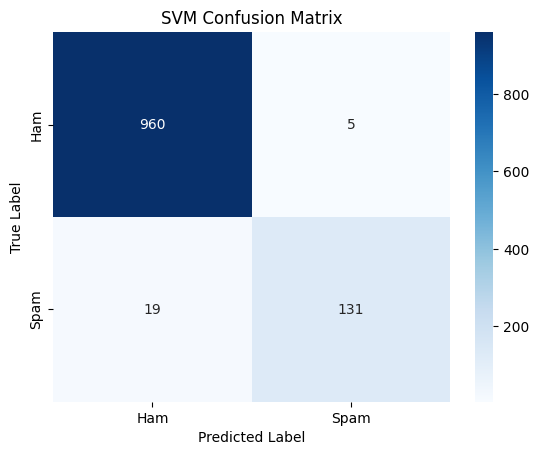

In [ ]:
# Plot confusion matrix for each classifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

def plot_conf_matrix_for_model(name, model, X_test_tfidf, y_test):
    preds = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'],
                yticklabels=['Ham', 'Spam'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Re-train each model on full training data and plot confusion matrix
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    plot_conf_matrix_for_model(name, model, X_test_tfidf, y_test)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>